Q.1: Import data and check null values, check column info and the descriptive statistics of the data.

In [544]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from sklearn.model_selection import train_test_split

                                             (1)- Data Import

In [545]:
data=pd.read_csv("transaction_anomalies_dataset.csv")

                                              (2)-Check Null Values

In [546]:
data.isnull().sum()

Transaction_ID                 0
Transaction_Amount             0
Transaction_Volume             0
Average_Transaction_Amount     0
Frequency_of_Transactions      0
Time_Since_Last_Transaction    0
Day_of_Week                    0
Time_of_Day                    0
Age                            0
Gender                         0
Income                         0
Account_Type                   0
dtype: int64

                                            (3)- Check Column Info

In [547]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               1000 non-null   object 
 1   Transaction_Amount           1000 non-null   float64
 2   Transaction_Volume           1000 non-null   int64  
 3   Average_Transaction_Amount   1000 non-null   float64
 4   Frequency_of_Transactions    1000 non-null   int64  
 5   Time_Since_Last_Transaction  1000 non-null   int64  
 6   Day_of_Week                  1000 non-null   object 
 7   Time_of_Day                  1000 non-null   object 
 8   Age                          1000 non-null   int64  
 9   Gender                       1000 non-null   object 
 10  Income                       1000 non-null   int64  
 11  Account_Type                 1000 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


                                              (4)- Descriptive Statistics of data

In [548]:
data.describe()

,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Age,Income
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,1038.122511,2.498000,1000.682506,12.078000,15.341000,40.641000,8.948238e+05
std,283.580055,1.115006,20.632334,4.245225,8.361258,13.819953,3.453562e+05
min,849.024392,1.000000,939.081423,5.000000,1.000000,18.000000,3.001590e+05
25%,966.028796,1.000000,986.800556,8.000000,8.000000,29.000000,5.917308e+05
50%,1002.118678,3.000000,1000.501902,12.000000,16.000000,41.000000,8.876645e+05
75%,1033.143657,3.000000,1015.155595,16.000000,22.000000,53.000000,1.178102e+06
max,3227.459108,4.000000,1073.154036,19.000000,29.000000,64.000000,1.499670e+06


Q.2: Check distribution of transactions amount in the data

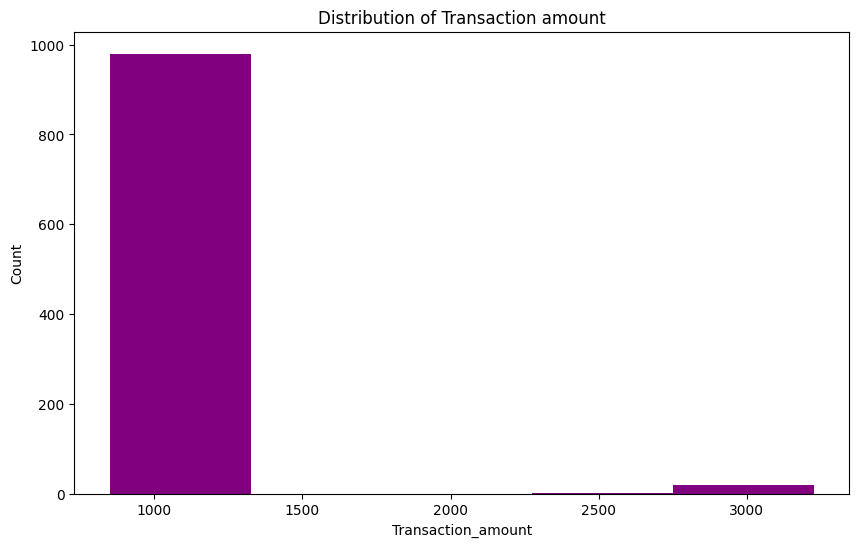

In [549]:
plt.figure(figsize=(10,6))
plt.hist(data["Transaction_Amount"],bins=5,color="purple")
plt.title("Distribution of Transaction amount")
plt.xlabel("Transaction_amount")
plt.ylabel("Count")
plt.show()

Q.3: Check distribution of transactions amount by account type

Text(0, 0.5, 'Tansaction_Amount')

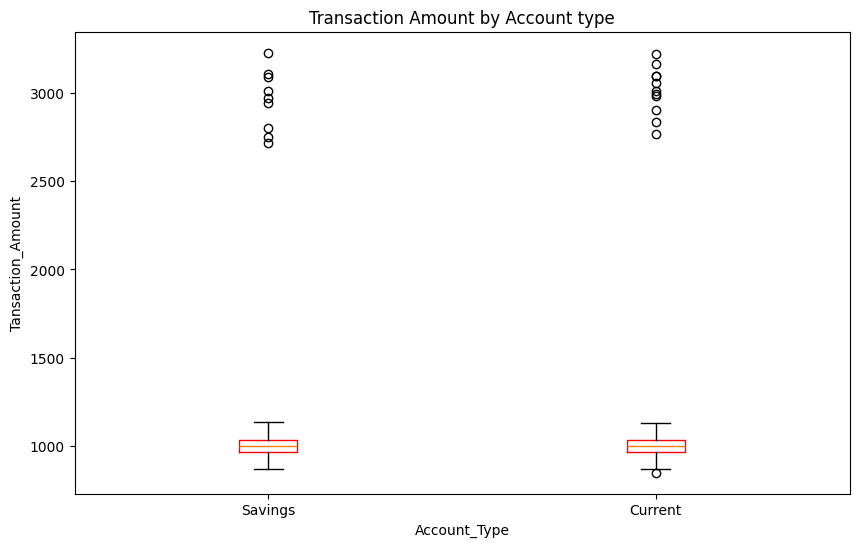

In [550]:
df=pd.DataFrame(data)
plt.figure(figsize=(10,6))
plt.boxplot([df[df["Account_Type"]=='Savings']["Transaction_Amount"],df[df["Account_Type"]=='Current']["Transaction_Amount"]],
            labels=["Savings","Current"],boxprops=dict(color="red"))
plt.title("Transaction Amount by Account type")
plt.xlabel("Account_Type")
plt.ylabel("Tansaction_Amount")

Q.4: Check the average transaction amount by age.


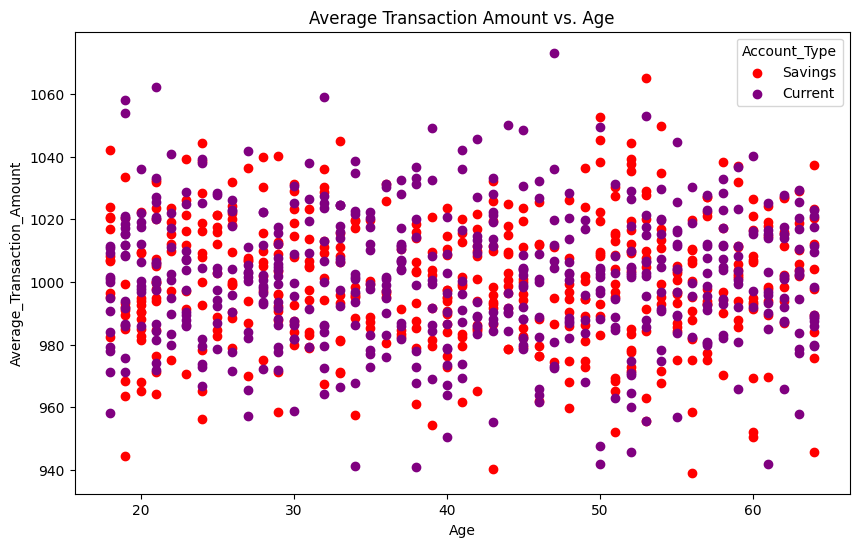

In [551]:
plt.figure(figsize=(10, 6))
for account_type,color in zip(df['Account_Type'].unique(),["red","purple"]):
    plt.scatter(df[df["Account_Type"] == account_type]["Age"],
                df[df["Account_Type"] == account_type]["Average_Transaction_Amount"],
                label=account_type,c=color)

    

plt.xlabel("Age")
plt.ylabel("Average_Transaction_Amount")
plt.title("Average Transaction Amount vs. Age")
plt.legend(title="Account_Type")

plt.show()

Q.5: Check the count of transactions by day of the week

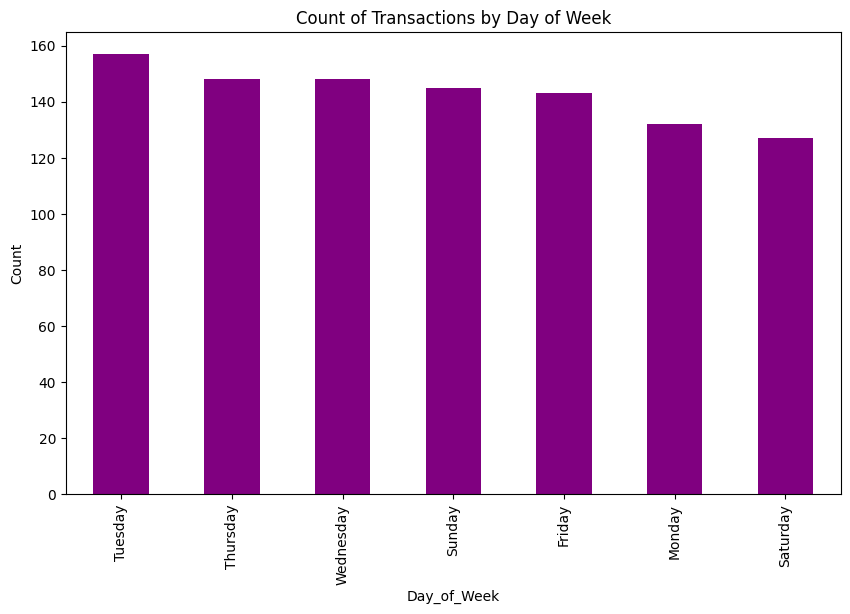

In [552]:
plt.figure(figsize=(10,6))
plt.xlabel("Day of Week")
plt.ylabel("Count")
plt.title("Count of Transactions by Day of Week")
df["Day_of_Week"].value_counts().plot(kind='bar',color="purple")
plt.show()

Q.6: Check the correlation between all the columns in the data


<Axes: >

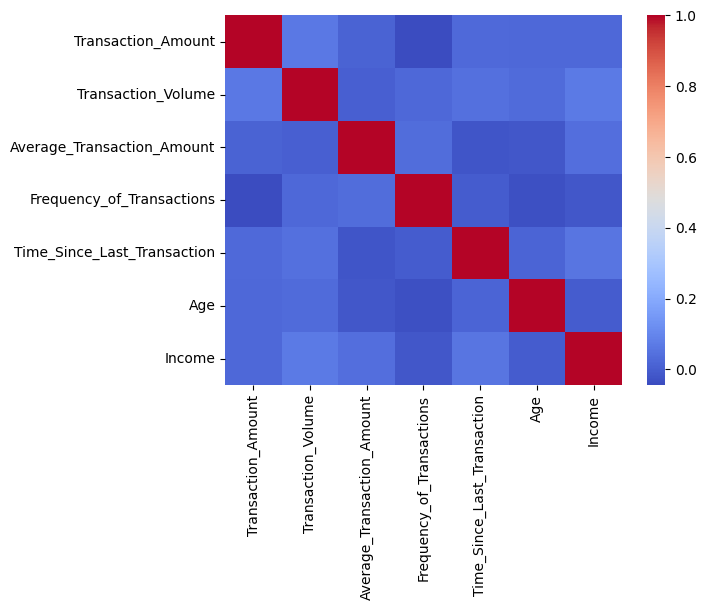

In [553]:
select_dtypes=df.select_dtypes(include=["number"])
Corr_matrix=select_dtypes.corr()
sns.heatmap(Corr_matrix,cmap="coolwarm")

Q.7: Visualize anomalies in the data

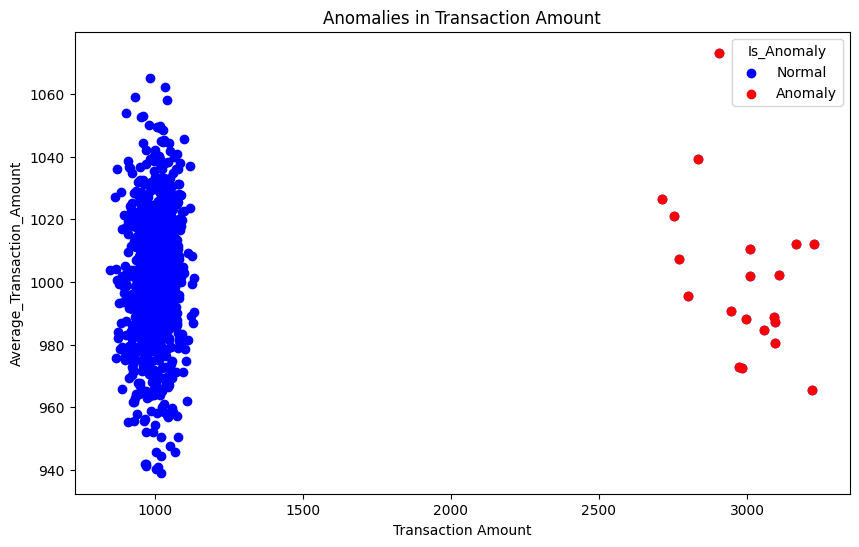

    Transaction_ID  Transaction_Amount  Transaction_Volume  \
0              TX0         1024.835708                   3   
1              TX1         1013.952065                   4   
2              TX2          970.956093                   1   
3              TX3         1040.822254                   2   
4              TX4          998.777241                   1   
..             ...                 ...                 ...   
995          TX995          901.138758                   3   
996          TX996          928.962516                   4   
997          TX997          950.921600                   2   
998          TX998          933.291962                   4   
999          TX999          968.289340                   3   

     Average_Transaction_Amount  Frequency_of_Transactions  \
0                    997.234714                         12   
1                   1020.210306                          7   
2                    989.496604                          5   
3      

In [554]:
plt.figure(figsize=(10, 6))
threshold = 1134  
plt.scatter(df['Transaction_Amount'], df['Average_Transaction_Amount'], c='blue', label='Normal')
df['Is_Anomaly'] = df['Transaction_Amount'] > threshold
anomaly_mask = df['Is_Anomaly']
plt.scatter(df[anomaly_mask]['Transaction_Amount'], df[anomaly_mask]['Average_Transaction_Amount'], c='red', label='Anomaly')

plt.xlabel("Transaction Amount")
plt.ylabel("Average_Transaction_Amount")
plt.title("Anomalies in Transaction Amount")
plt.legend(title="Is_Anomaly")
plt.show()
print(df)

Q.8: Calculate the number of anomalies in the data to find the ratio of anomalies in the data,
which will be useful while using anomaly detection algorithms like isolation forest.


In [555]:
total_count=len(df)
anomalies_count=len(df[df["Is_Anomaly"]==True])
result=anomalies_count/total_count
print(f"Number of Anomalies:{anomalies_count}")
print(f"Number of data points:{total_count}")
print(f"Ratio of Anomalies in the data:{result}")

Number of Anomalies:20
Number of data points:1000
Ratio of Anomalies in the data:0.02


Q.9: Select the relevant features and fit them into the Machine Learning model “isolation
forest” for detecting anomalies. Now get the prediction and convert into binary values.


In [556]:
X=df[['Transaction_Amount','Average_Transaction_Amount','Frequency_of_Transactions']]
y=df['Is_Anomaly']

In [557]:
X

,Transaction_Amount,Average_Transaction_Amount,Frequency_of_Transactions
0,1024.835708,997.234714,12
1,1013.952065,1020.210306,7
2,970.956093,989.496604,5
3,1040.822254,969.522480,16
4,998.777241,1007.111026,7
...,...,...,...
995,901.138758,976.363229,17
996,928.962516,1028.292292,10
997,950.921600,1022.823424,13
998,933.291962,994.325450,10


In [558]:
y

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Is_Anomaly, Length: 1000, dtype: bool

In [559]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [560]:
X_train

,Transaction_Amount,Average_Transaction_Amount,Frequency_of_Transactions
29,1012.994140,1015.636457,13
535,964.863599,975.906134,9
695,1024.250065,990.643556,10
557,1016.803558,1039.143491,19
836,969.415017,941.276759,11
...,...,...,...
106,876.417775,984.062095,19
270,1061.914154,1000.425432,10
860,1035.920871,996.845060,14
435,987.707501,987.715268,9


In [561]:
model=IsolationForest( contamination=float(0.02))
model.fit(X_train,y_train)

IsolationForest(contamination=0.02)

In [562]:

 y_predict=model.predict(X_test)

y_predict



array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [563]:
# Get the indices where anomalies are predicted
anomaly_indices = np.where(y_predict<0)

# Print the indices of anomalies
print("Indices of anomalies:", anomaly_indices)

Indices of anomalies: (array([ 39,  50,  79, 102], dtype=int64),)


In [564]:
y_pred_binary = [1 if x == -1 else 0 for x in y_predict]
print(classification_report(y_test, y_pred_binary, zero_division=1))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       196
        True       1.00      1.00      1.00         4

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



Q.11: Use the trained model to detect anomalies to bring following result

In [573]:

transaction_amount = float(input("Enter transaction amount:"))
avg_transaction_amount = float(input("Enter average transaction amount:"))
frequency = float(input("Enter frequency of transactions:"))

# Prepare the input data
data = [[transaction_amount, avg_transaction_amount, frequency]]

# Use the trained model to predict
prediction = model.predict(data)[0]  # Assuming the first element is the prediction for the input

# Check for anomaly
if prediction == -1:
    print("Anomaly detected!")
else:
    print("Normal transaction.")



Enter transaction amount: 995
Enter average transaction amount: 993
Enter frequency of transactions: 12


Normal transaction.


C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
